In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from sqlalchemy import create_engine, text
from sklearn.preprocessing import LabelEncoder


In [3]:
pip install flask_sqlalchemy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import sqlalchemy
import pymysql
from sqlalchemy import create_engine, text
import mysql.connector

In [64]:
username = "root"
password = ""
host = "localhost:3306"
database = "us_accident"
engine = sqlalchemy.create_engine("mysql+mysqlconnector://{0}:{1}@{2}/{3}".format(username, password, host, database))

In [6]:
data = pd.read_csv("C:/Users/Om SaiRam/Desktop/Sai/archive/US_Accidents.csv")

In [8]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [10]:
# rename columns in x
data.rename(columns = {
    'Temperature(F)' : 'Temperature',
    'Wind_Chill(F)' : 'Wind_Chill',
    'Distance(mi)' : 'Distance',
    'Humidity(%)' : 'Humidity',
    'Pressure(in)' : 'Pressure',
    'Visibility(mi)' : 'Visibility',
    'Wind_Speed(mph)' : 'Wind_Speed',
    'Precipitation(in)': 'Precipitation'
}, inplace = True)

In [11]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
data.nunique()

In [13]:
#Changing Id from catagorical variable to numeric
le = LabelEncoder()

In [14]:
le.fit(data['ID'])
le.fit(data['Street'])
le.fit(data['City'])
le.fit(data['Wind_Direction'])
le.fit(data['Weather_Condition'])

LabelEncoder()

In [15]:
data['ID'] = le.fit_transform(data['ID'])
data['City'] = le.fit_transform(data['City'])
data['Street'] = le.fit_transform(data['Street'])
data['Timezone'] = le.fit_transform(data['Timezone'])
data['Wind_Direction'] = le.fit_transform(data['Wind_Direction'])
data['Weather_Condition'] = le.fit_transform(data['Weather_Condition'])
data['ID']

0                0
1          1111111
2          2067565
3          2178676
4          2289787
            ...   
2845337    2050378
2845338    2050379
2845339    2050381
2845340    2050382
2845341    2050383
Name: ID, Length: 2845342, dtype: int32

In [16]:
# def export_data():
#     with engine.begin()as conn:
#         data.head(5).to_sql(con=conn, name='dataset', if_exists='append', index=False)
# export_data()    



In [16]:
data.describe()

,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,Number,Street,City,Timezone,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.845342e+06,2.687398e+06,2.295884e+06,2.845342e+06
mean,1.422670e+06,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,1.034549e+05,5.933791e+03,1.569948e+00,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,1.066499e+01,7.395044e+00,7.016940e-03,3.861142e+01
std,8.213796e+05,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,4.118555e+04,3.210433e+03,1.129451e+00,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,7.610700e+00,5.527454e+00,9.348831e-02,3.434061e+01
min,0.000000e+00,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.113352e+05,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,7.763725e+04,3.261000e+03,1.000000e+00,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.000000e+00,3.500000e+00,0.000000e+00,1.500000e+01
50%,1.422670e+06,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,1.232310e+05,6.262000e+03,1.000000e+00,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,1.100000e+01,7.000000e+00,0.000000e+00,1.500000e+01
75%,2.134006e+06,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,1.302330e+05,8.691000e+03,3.000000e+00,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.700000e+01,1.000000e+01,0.000000e+00,7.600000e+01
max,2.845341e+06,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.596510e+05,1.168100e+04,4.000000e+00,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,2.400000e+01,1.087000e+03,2.400000e+01,1.270000e+02


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     int32  
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance               float64
 9   Description            object 
 10  Number                 float64
 11  Street                 int32  
 12  Side                   object 
 13  City                   int32  
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               int32  
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature            float64
 22  Wind_Chill        

In [18]:
nullvalues = data.isnull().sum()
nullvalues

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance                       0
Description                    0
Number                   1743911
Street                         0
Side                           0
City                           0
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                       0
Airport_Code                9549
Weather_Timestamp          50736
Temperature                69274
Wind_Chill                469643
Humidity                   73092
Pressure                   59200
Visibility                 70546
Wind_Direction                 0
Wind_Speed                157944
Precipitation             549458
Weather_Condition              0
Amenity   

In [21]:
#droping unwanted columns
data.drop(['Astronomical_Twilight','Nautical_Twilight','Civil_Twilight','Sunrise_Sunset','Airport_Code','Weather_Timestamp','Zipcode'], axis= 1, inplace= True)
#fill null values by mean
data['City'].fillna(data['City'].mean(), inplace = True)

data['Street'].fillna(data['Street'].mean(), inplace = True)
data['Timezone'].fillna(data['Timezone'].mean(), inplace = True)
data['Number'].fillna(data['Number'].mean(), inplace = True)
data['Temperature'].fillna(data['Temperature'].mean(), inplace = True)
data['Wind_Chill'].fillna(data['Wind_Chill'].mean(), inplace = True)
data['Humidity'].fillna(data['Humidity'].mean(), inplace = True)
data['Pressure'].fillna(data['Pressure'].mean(), inplace = True)
data['Visibility'].fillna(data['Visibility'].mean(), inplace = True)
data['Wind_Direction'].fillna(data['Wind_Direction'].mean(), inplace = True)
data['Wind_Speed'].fillna(data['Wind_Speed'].mean(), inplace = True)
data['Precipitation'].fillna(data['Precipitation'].mean(), inplace = True)
data['Weather_Condition'].fillna(data['Weather_Condition'].mean(), inplace = True)

In [22]:
data.isnull().sum()

ID                   0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance             0
Description          0
Number               0
Street               0
Side                 0
City                 0
County               0
State                0
Country              0
Timezone             0
Temperature          0
Wind_Chill           0
Humidity             0
Pressure             0
Visibility           0
Wind_Direction       0
Wind_Speed           0
Precipitation        0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64

<AxesSubplot: >

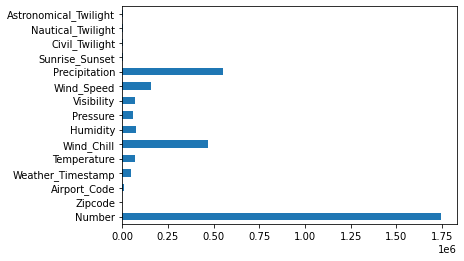

In [23]:
#null value plot
nullvalues[nullvalues != 0].plot(kind = 'barh')

In [24]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Country', 'Timezone', 'Temperature',
       'Wind_Chill', 'Humidity', 'Pressure', 'Visibility', 'Wind_Direction',
       'Wind_Speed', 'Precipitation', 'Weather_Condition', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [25]:
#we will check accordingly with city column
data['City']

0          2822
1          2534
2          1904
3            70
4          1904
           ... 
2845337    8856
2845338    9235
2845339    7740
2845340    2419
2845341    4656
Name: City, Length: 2845342, dtype: int32

In [26]:
data['City'].nunique()

11682

In [27]:
data['City'].describe()

count    2.845342e+06
mean     5.933791e+03
std      3.210433e+03
min      0.000000e+00
25%      3.261000e+03
50%      6.262000e+03
75%      8.691000e+03
max      1.168100e+04
Name: City, dtype: float64

In [28]:
accident_in_cities = data.City.value_counts()
accident_in_cities.head()

6612    106966
5981     68956
7773     54691
2470     41979
4836     39448
Name: City, dtype: int64

<AxesSubplot: xlabel='City', ylabel='Count'>

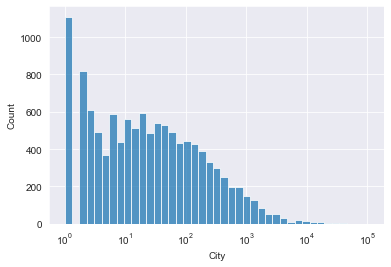

In [29]:
sns.set_style("darkgrid")
sns.histplot(accident_in_cities, log_scale = True)

In [30]:
high_accident_in_city = accident_in_cities[accident_in_cities > 1000]
low_accident_in_city = accident_in_cities[accident_in_cities< 1000]

In [31]:
high_accident_in_city

6612     106966
5981      68956
7773      54691
2470      41979
4836      39448
          ...  
1450       1009
10827      1005
10584      1001
10712      1001
5982       1001
Name: City, Length: 494, dtype: int64

In [32]:
low_accident_in_city

7808     997
6136     997
6217     992
8436     988
9372     985
        ... 
4811       1
2368       1
7545       1
10540      1
204        1
Name: City, Length: 11186, dtype: int64

C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_61516\235313507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_in_city)


<AxesSubplot: xlabel='City', ylabel='Density'>

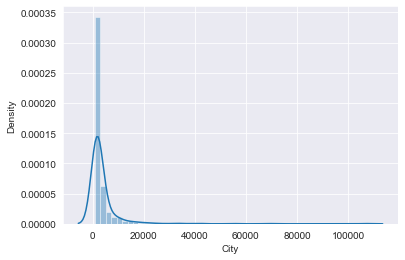

In [33]:
sns.distplot(high_accident_in_city)

In [34]:
accident_in_cities[accident_in_cities == 1]

435      1
1990     1
11316    1
9081     1
10668    1
        ..
4811     1
2368     1
7545     1
10540    1
204      1
Name: City, Length: 1110, dtype: int64

In [35]:
data.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [36]:
data.Start_Time[0]

'2016-02-08 00:37:08'

In [37]:
#explore hour of the day
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_61516\3680741054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Start_Time.dt.hour, bins=24, kde = False, norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

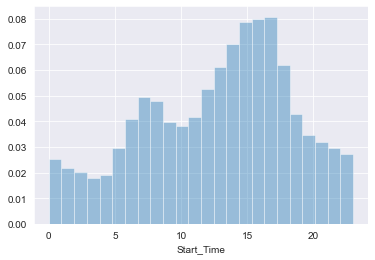

In [38]:
sns.distplot(data.Start_Time.dt.hour, bins=24, kde = False, norm_hist=True)

C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_61516\3109722993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Start_Time.dt.day_of_week, bins=7, kde = False, norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

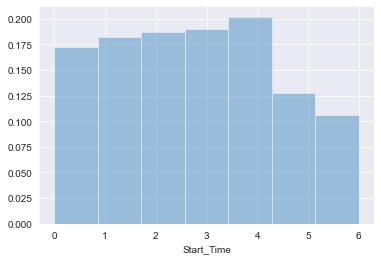

In [39]:
sns.distplot(data.Start_Time.dt.day_of_week, bins=7, kde = False, norm_hist=True)

In [40]:
start_time_sunday = data.Start_Time[data.Start_Time.dt.dayofweek == 6]
start_time_sunday

154       2016-02-14 03:58:33
155       2016-02-14 05:26:58
156       2016-02-14 16:30:40
157       2016-02-14 16:38:40
158       2016-02-14 17:40:17
                  ...        
2843129   2019-08-18 22:48:14
2843130   2019-08-18 23:24:10
2843243   2019-08-18 22:56:56
2843244   2019-08-18 22:56:56
2843282   2019-08-18 22:54:41
Name: Start_Time, Length: 259274, dtype: datetime64[ns]

C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_61516\3507159569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(start_time_sunday.dt.hour, bins=24, kde = False, norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

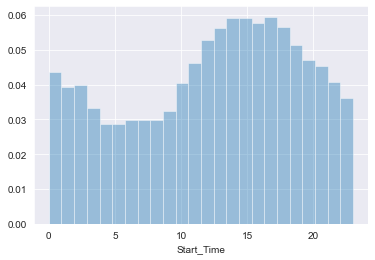

In [41]:
sns.distplot(start_time_sunday.dt.hour, bins=24, kde = False, norm_hist=True)


In [42]:
start_time_monday = data.Start_Time[data.Start_Time.dt.dayofweek == 0]
start_time_monday

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2843321   2019-08-19 20:43:02
2843322   2019-08-19 20:41:30
2843675   2019-08-19 22:18:31
2843676   2019-08-19 22:21:28
2843677   2019-08-19 22:31:15
Name: Start_Time, Length: 419821, dtype: datetime64[ns]

C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_61516\4048812803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(start_time_monday.dt.hour, bins=24, kde = False, norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

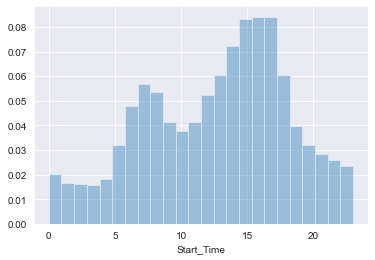

In [43]:
sns.distplot(start_time_monday.dt.hour, bins=24, kde = False, norm_hist=True)


In [44]:
data.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [45]:
data.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [46]:
#10% sample of the total data
sample_df = data.sample(int(0.1 * len(data)))
sample_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,Description,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
1340102,377897,2,2021-10-22 23:52:07,2021-10-23 01:52:47,33.762214,-79.446533,33.762500,-79.447277,0.047,Incident on LEWIS RD near SC-41 Drive with cau...,...,False,False,False,False,False,False,False,False,False,False
1365873,406529,2,2021-04-19 06:16:00,2021-04-19 19:11:38,27.871679,-82.745472,27.873554,-82.745524,0.130,Slow traffic from 90th Ave N (Belcher Rd) to F...,...,False,False,False,False,False,True,False,False,False,False
669553,2478182,2,2021-09-29 19:05:00,2021-09-29 21:09:23.000000000,37.650046,-77.604593,37.649709,-77.608050,0.191,Slow traffic on US-250 W from Brownstone Blvd ...,...,False,False,False,False,False,False,False,False,True,False
1354819,394248,2,2021-11-16 00:36:30,2021-11-16 01:10:30,33.824444,-84.490564,33.818408,-84.495580,0.507,Stationary traffic on I-285 S - GA-407 S from ...,...,False,False,False,False,False,False,False,False,False,False
2541617,1712912,4,2019-01-20 17:23:13,2019-01-20 17:53:10,34.256350,-85.118820,34.219384,-85.122488,2.563,Closed at US-411/GA-20/Marvin W Cap Hicks Hwy ...,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,2086567,2,2016-05-10 18:06:53,2016-05-11 00:06:53,37.491100,-122.218630,37.487640,-122.207320,0.665,At CA-84/Woodside Rd/Exit 408 - Accident.,...,False,True,False,False,False,False,False,False,False,False
2325990,1473326,2,2020-02-03 06:53:00,2020-02-03 07:46:58,37.824861,-122.313611,37.824861,-122.313611,0.000,At Bay Bridge Toll Plz - Accident.,...,False,False,False,False,False,False,False,False,False,False
1616204,684676,2,2021-02-17 09:45:00,2021-02-17 10:41:30,44.989744,-93.089285,44.977043,-93.088819,0.878,Slow traffic on US-10 E - I-35E S from Larpent...,...,False,False,False,False,False,False,False,False,False,False
1922501,1025006,2,2020-11-30 23:44:00,2020-12-01 02:52:00,36.855038,-121.570431,36.859915,-121.592805,1.282,Stationary traffic on CA-156 W - US-101 S - El...,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: xlabel='Start_Lng', ylabel='Start_Lat'>

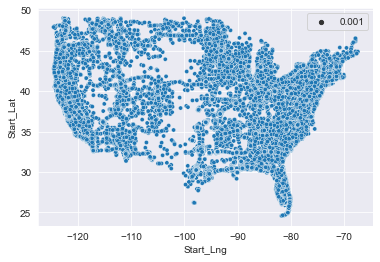

In [47]:
#longitude = left to right and latitude = top to bottom
#point size = 0.001
sns.scatterplot(x=sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001 )

In [48]:
lat, lon = data.Start_Lat[0], data.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [49]:
#iterate column-wise
for x in data[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

402361     38.495482
1935806    34.056516
458073     37.723283
1592330    33.727957
1205199    28.326695
             ...    
426821     42.773739
2703452    43.172904
1635117    45.690883
2069924    38.555870
1121263    37.578381
Name: Start_Lat, Length: 100, dtype: float64
402361     -77.383796
1935806    -81.130787
458073    -121.647458
1592330    -78.952608
1205199    -81.489712
              ...    
426821     -92.337435
2703452    -71.551941
1635117   -121.772821
2069924   -121.442390
1121263    -77.466713
Name: Start_Lng, Length: 100, dtype: float64


C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_61516\343975538.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x in data[['Start_Lat', 'Start_Lng']].sample(100).iteritems():


<AxesSubplot: xlabel='Visibility', ylabel='Count'>

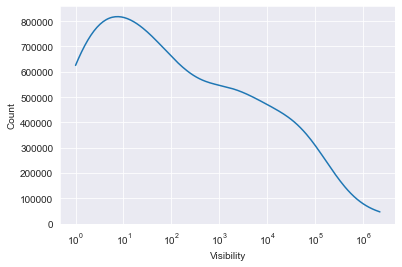

In [50]:
sns.histplot(data['Visibility'].value_counts(), bins= 5, kde=True, log_scale=True)

<AxesSubplot: ylabel='Crossing'>

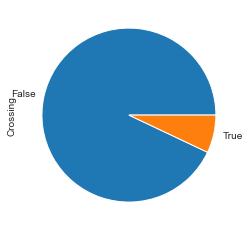

In [51]:
data['Crossing'].value_counts().plot(kind= 'pie')

<AxesSubplot: ylabel='Traffic_Signal'>

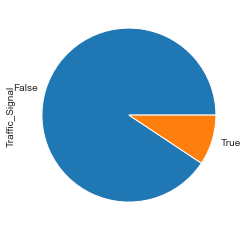

In [52]:
data['Traffic_Signal'].value_counts().plot(kind='pie')


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 40 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 int32         
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           object        
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   End_Lat            float64       
 7   End_Lng            float64       
 8   Distance           float64       
 9   Description        object        
 10  Number             float64       
 11  Street             int32         
 12  Side               object        
 13  City               int32         
 14  County             object        
 15  State              object        
 16  Country            object        
 17  Timezone           int32         
 18  Temperature        float64       
 19  Wind_Chill         float64       
 20  Humidity           float

In [70]:
data.to_sql(con = engine, name = 'dataset', if_exists = 'replace')

-1